# k-최근접 이웃 회귀

* 회귀
  * 임의의 수치를 예측
  * 타깃 값도 임의의 수치가 됨
  * K-최근접 이웃 회귀: 가장 가까운 이웃 샘플들의 타깃 값을 평균으로 만들어 예측
* 결정계수(R2)
  * 회귀 문제 성능 측정 도구
  * 1에 가까울수록 良 0에 가까울 수록 惡
  * 과대 적합: 훈련 세트 성능이 테스트 성능보다 훨씬 높을 때 발생 (훈련에 치우침)
  * 과소 적합: 과대와 반대 (더 복잡한 모델 사용해야)

  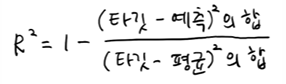

## 데이터 준비

In [22]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

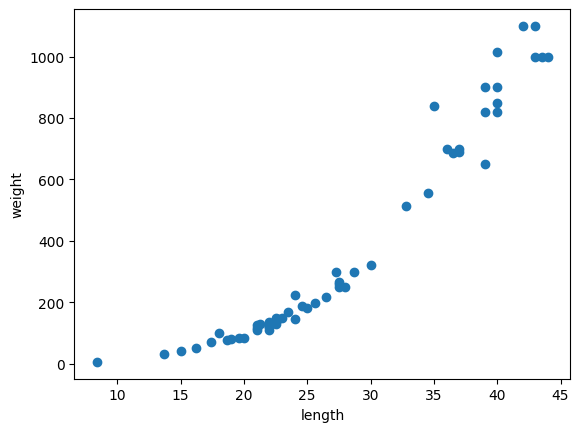

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

➡ 길이가 길면 무게도 무거워지는 그래프임을 알 수 있음

### 훈련, 테스트 세트로 나누기

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(42,) (14,)


➡ 1차원 배열임

* 사이킷런에 사용할 데이터는 2차원 배열이어야 함

### 2차원 배열로 변경

In [9]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [10]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


➡ 2차원 배열로 변경 完

### 모델 학습


In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
# 알고리즘 모델 적용
knr = KNeighborsRegressor()
# 모델 학습 (입력D, 정답D)
knr.fit(train_input, train_target)

KNeighborsRegressor()

### 평가
* R^2 평가: 1에 가까울수록 정확도가 높음

In [13]:
knr.score(test_input, test_target)

0.992809406101064

➡ 0.99로 1에 가까운 결과 출력

### 평균 절대값 오차 MAE
> `실제값-예측값`


In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
# 테스트 세트에 대한 예측
test_p = knr.predict(test_input)
# 테스트 세트의 평균 절대값 오차를 계산
mae = mean_absolute_error(test_target, test_p)
print(mae)

19.157142857142862


### 과대 적합 & 과소 적합
* 하나에 치우치지 않아야 함
* 과대: 훈련 > 테스트
* 과소: 훈련 < 테스트

In [16]:
# 훈련으로 확인
print(knr.score(train_input, train_target))

0.9698823289099254


* 테스트 세트 결정계수: 0.992809406101064
* 훈련 세트 결정계수: 0.9698823289099254
### ➡ 과소 적합

### 과소 적합 해결 방법
* 이웃의 개수(파라미터-범위)를 변경

In [17]:
knr.n_neighbors = 3

In [18]:
# 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [19]:
knr.score(test_input, test_target)

0.9746459963987609

* 테스트: 0.97
* 훈련: 0.98

➡ 테스트가 훈련 세트보다 낮아짐 == 과소 적합의 문제 해결

In [20]:
knr.predict([[40]])

array([921.66666667])

### 확인 문제
1. 5~45 사이의 값을 2차원으로 변경
2. 반복문을 통해 1, 5, 10 경우의 수를 변경

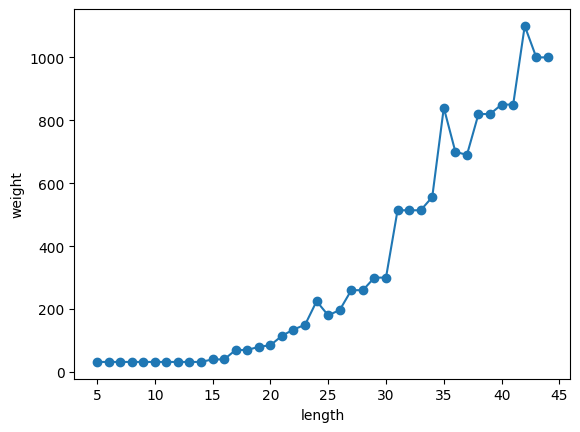

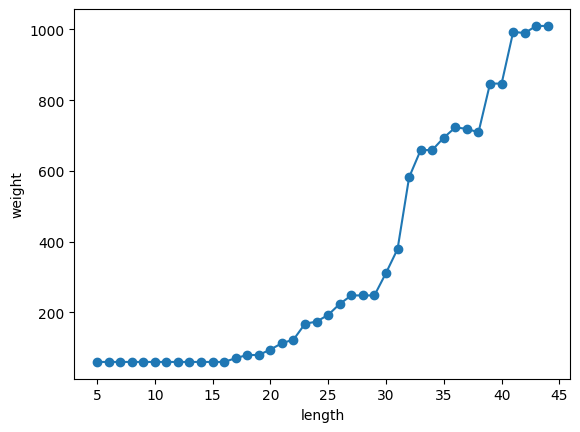

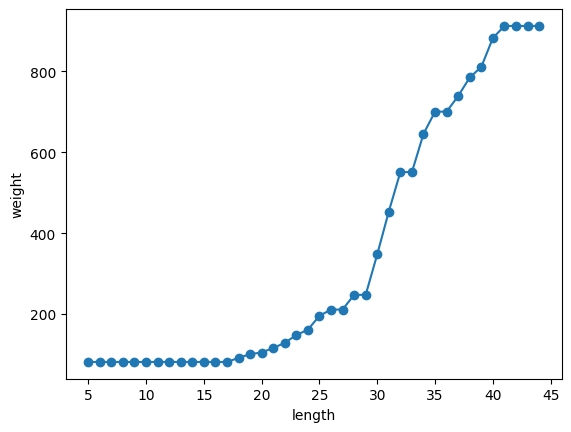

In [24]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1) #1

for n in [1, 5, 10]: #2
  # 모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  # 지정 범위 x에 대한 예측 구함
  prediction = knr.predict(x)

  # 훈련 세트와 예측 결과 그래프
  plt.scatter(x, prediction)
  plt.plot(x, prediction)
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()